# East African News Classification

## Business Understanding

### Business Overview

> The "East African News Classification" dataset presents an opportunity for news organizations in the region to automate and improve the accuracy of news categorization. Analyzing the dataset enables identification of emerging trends and provides valuable insights into East African news.


### Business Problem

* News outlets have been grappling with the time-consuming and error-prone manual process of categorizing news articles from East African nations. This inefficient approach hinders their ability to track media streams, understand cultural influences on press reporting, and provide tailored insights. 
* By implementing a machine learning text classification model, the news outlet can automate and improve the accuracy of categorization, enabling them to efficiently track information flows, identify emerging trends, and gain valuable insights into how culture shapes press reporting in the region. 
* This investment in a robust text classification model would streamline operations, ensure consistency, and enhance their reporting capabilities, ultimately allowing them to better serve their audience and remain competitive.


## Data Understanding

* For this project, we analysed an East African News Classification dataset which has 23268 rows 3 columns.
* The three columns are {text}, {label} and {category}
* We chose this Dataset because it offers critical insights into media streams across East Africa, allowing for tailored insights related to racial tensions and social shifts.




 - Ensure consistency and accuracy in news categorization.
 - Streamline the news outlet's operations by implementing a robust text classification model.
 - Improve the ability to track information flows in East African media streams.
 - Provide valuable insights into the impact of cultural factors on press reporting.
 - Better serve the news outlet's audience by delivering relevant and timely news content.




## Objectives

### General Objectives

### Specific Objectives

 - To develop a machine learning model that can accurately classify East African news articles into relevant categories or topics.
 - To provide a user-friendly application that integrates with existing news platforms or search engines, enabling easy adoption and integration for news organizations and content providers.
 - To enhance the news consumption experience for readers by providing personalized and tailored access to relevant news articles.


### Success Metrics

 - The overall metric used for this project is accuracy, to measure the correctly classified instances. Benchmark is 75%.


## Data Preparation

## Modeling

## Evaluation

## Deployment

## Importing Necessary Libraries

Let's start by importing the relevant libraries

In [6]:
import pandas as pd
import nltk
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from nltk.tokenize import RegexpTokenizer
nltk.download('punkt')
import nltk
import re
import string
from bs4 import BeautifulSoup
import requests
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import pickle
from sklearn.model_selection import GridSearchCV

[nltk_data] Downloading package punkt to /Users/gitahi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [7]:
# Checking the first five rows of the dataset
df = pd.read_csv('data/train_v0.2.csv')
df.head()

,text,label
0,"Bodi ya Utalii Tanzania (TTB) imesema, itafan...",uchumi
1,"PENDO FUNDISHA-MBEYA RAIS Dk. John Magufuri, ...",kitaifa
2,Mwandishi Wetu -Singida BENKI ya NMB imetoa ms...,uchumi
3,"TIMU ya taifa ya Tanzania, Serengeti Boys jan...",michezo
4,Na AGATHA CHARLES – DAR ES SALAAM ALIYEKUWA K...,kitaifa


In [8]:
# Checking the first five rows of the dataset
scraped_data = pd.read_csv('data/scraped_data.csv')
scraped_data.head()

,text,label
0,WAPENZI wa sanaa na burudani Mlima Kenya na ko...,burudani
1,ISHU ya Stivo Simple Boy na The Sailors imenia...,burudani
2,MWIMBAJI Esther Akoth almaarufu Akothee amelal...,burudani
3,MWANABAHARI Betty Kyalo ameshikilia kuwa bado ...,burudani
4,MWANAMUZIKI Richell Bonner almaarufu Richie Sp...,burudani


In [9]:
df = pd.concat([df,scraped_data],axis=0)

In [10]:
#profile = ProfileReport(df)


In [11]:
#profile.to_widgets()

# Data Cleaning

## Missing Values

Let's check for missing values


In [12]:
# Function to check for missing values
def check_missing_values(data):
    missing_values = df.isnull().sum()
    if missing_values.any():
        print("Missing values found:")
        print(missing_values)
    else:
        print("No missing values found.")

# Check for
check_missing_values(df)

Missing values found:
text     1
label    0
dtype: int64


Here we found missing values so we shall drop them

In [13]:
# Drop row with missing value
df.dropna(axis=0, inplace=True)

# Confirm missing rows dropped
check_missing_values(df)

No missing values found.


## Duplicate Values

Let's check for duplicates in the  dataset

In [14]:
# Function to check for duplicates
def check_duplicates(df):
    duplicates = df.duplicated()
    if duplicates.any():
        print("Duplicate rows found:")
        print(df[duplicates])
    else:
        print("No duplicate rows found.")

check_duplicates(df)

Duplicate rows found:
                                                 text label
39  \n[email protected]\nMdalasini\nMDALASINI ni k...  afya


In [15]:
#function for removing duplicates 
# handling the duplicates 
def remove_duplicated_rows(df):
    """Simple Function to remove duplicated rows"""
    df.drop_duplicates(subset=None, keep="first", inplace=True)
    # confirm if the duplicated rows have been removed
    confirm = check_duplicates(df)

    return confirm 


remove_duplicated_rows(df)

No duplicate rows found.


Lets transform the data to lowercase

In [16]:
# Transform text to lowercase
df["text"] = df["text"].str.lower()
df.head()

,text,label
0,"bodi ya utalii tanzania (ttb) imesema, itafan...",uchumi
1,"pendo fundisha-mbeya rais dk. john magufuri, ...",kitaifa
2,mwandishi wetu -singida benki ya nmb imetoa ms...,uchumi
3,"timu ya taifa ya tanzania, serengeti boys jan...",michezo
4,na agatha charles – dar es salaam aliyekuwa k...,kitaifa


## Clean the text data by removing special characters, digits, and converting to lowercase

Our dataset had alot of special characters and digits so we need to remove them and clean the data

In [17]:
# Clean the text data by removing special characters, digits, and converting to lowercase
df['cleaned_text'] = df['text'].apply(lambda x: re.sub(r'[^a-zA-Z]', ' ', x))
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: x.lower())
df.head(1)

,text,label,cleaned_text
0,"bodi ya utalii tanzania (ttb) imesema, itafan...",uchumi,bodi ya utalii tanzania ttb imesema itafan...


## Removing emojis

Our dataset also had alot of emojis which we also removed

In [18]:
def remove_emojis(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002500-\U00002BEF"  # Chinese/Japanese/Korean characters
                           u"\U00002702-\U000027B0"
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\U0001f926-\U0001f937"
                           u"\U00010000-\U0010FFFF"
                           u"\u2640-\u2642"
                           u"\u2600-\u2B55"
                           u"\u200d"
                           u"\u23cf"
                           u"\u23e9"
                           u"\u231a"
                           u"\ufe0f"  # dingbats
                           u"\u3030"
                           "]+", flags=re.UNICODE)
    cleaned_text = emoji_pattern.sub(r'', text)
    return cleaned_text

In [19]:
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: remove_emojis(x))
df.tail()

,text,label,cleaned_text
212,uhakika wa kupata malisho ni mojawapo ya chang...,uchumi,uhakika wa kupata malisho ni mojawapo ya chang...
213,ukiingia katika shamba la ololo eneo la kajiad...,uchumi,ukiingia katika shamba la ololo eneo la kajiad...
214,shamba la charles mburu ni bustani ya mseto wa...,uchumi,shamba la charles mburu ni bustani ya mseto wa...
215,"wakati hafanyi kazi na naivaa, chapa ya mitind...",uchumi,wakati hafanyi kazi na naivaa chapa ya mitind...
216,baada ya kusaka ajira kwa muda mrefu pasi na m...,uchumi,baada ya kusaka ajira kwa muda mrefu pasi na m...


Our dataset now has no more emojis

## Removing stopwords

We made a custom stopwords list for identifying the stopwords to be removed from the dataset

In [20]:
# sample text before removing stopwords
df['cleaned_text'][0]

0     bodi ya utalii tanzania  ttb  imesema  itafan...
0    wapenzi wa sanaa na burudani mlima kenya na ko...
Name: cleaned_text, dtype: object

We defined a function to remove the stopwords that have been identified in the list and further checked to confirm that they have been removed

In [21]:
# defining stopwords list
stopwords_swahili = ['akasema', 'alikuwa', 'alisema', 'baada', 'basi','bila', 'cha', 'chini', 'hadi', 'hapo', 'hata','hivyo', 'hiyo', 'huku', 'huo', 'ili',
'ilikuwa', 'juu', 'kama', 'karibu', 'katika', 'kila ', 'kima', 'kisha', 'kubwa', 'kutoka', 'kuwa', 'kwa', 'kwamba', 'kwenda', 'kwenye', 'la', 'lakini', 'mara',
'mdogo', 'mimi', 'mkubwa', 'mmoja', 'moja', 'muda', 'mwenye', 'na', 'naye', 'ndani', 'ng', 'ni', 'nini', 'pamoja', 'pia', 'sana', 'sasa', 'sauti', 'tafadhali', 'tena',
'tu', 'ule', 'vile', 'wa', 'wakati', 'wake', 'walikuwa', 'wao', 'watu', 'wengine', 'wote', 'ya', 'yake', 'yangu', 'yao', 'yeye', 'yule', 'za', 'zaidi', 'zake', 'vya']

In [22]:
# function to remove stopwords
def swahili_stops(text):
    no_stops = " ".join([word for word in text.split() if word not in stopwords_swahili])
    return no_stops

In [23]:
# confirming stopwords removal
df['cleaned_text'] = df['cleaned_text'].apply(lambda text : swahili_stops(text))
df['cleaned_text'][0]

0    bodi utalii tanzania ttb imesema itafanya misa...
0    wapenzi sanaa burudani mlima kenya kote nchini...
Name: cleaned_text, dtype: object

In [24]:
df.reset_index(inplace=True)

In [25]:
df['cleaned_text'][0]

'bodi utalii tanzania ttb imesema itafanya misafara kutangaza utalii miji minne nchini china kati juni juni mwaka huu misafara itatembelea miji beijing juni shanghai juni nanjig juni changsha juni mwenyekiti bodi ttb jaji mstaafu thomas mihayo ameyasema hayo mkutano waandishi habari jijini dar es salaam tunafanya jitihada kuhakikisha tunavuna watalii wengi china hasa tukizingatia umuhimu soko sekta utalii nchini amesema jaji mihayo novemba ttb ilifanya ziara miji beijing shanghai chengdu guangzhou hong kong kutangaza vivutio utalii sanjari kuzitangaza safari ndege air tanzania ziara inaelezwa kuzaa matunda ikiwa watalii kuja nchini mei mwaka huu kutembelea vivutio utalii'

This confirms that there are no more stopwords

## Removing punctuations

Our dataset also had alot of punctuations so we had to remove them. But first let's see what kind of punctuations we had in our dataset

In [26]:
# punctuation
exclude = string.punctuation
print(exclude)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [27]:
# remove punctuations
def remove_punctuations(text):
    
    for char in exclude:
        text = text.replace(char,'')
    return text

In [28]:
df['cleaned_text'] = df['cleaned_text'].apply(remove_punctuations)
df.head()

,index,text,label,cleaned_text
0,0,"bodi ya utalii tanzania (ttb) imesema, itafan...",uchumi,bodi utalii tanzania ttb imesema itafanya misa...
1,1,"pendo fundisha-mbeya rais dk. john magufuri, ...",kitaifa,pendo fundisha mbeya rais dk john magufuri ame...
2,2,mwandishi wetu -singida benki ya nmb imetoa ms...,uchumi,mwandishi wetu singida benki nmb imetoa msaada...
3,3,"timu ya taifa ya tanzania, serengeti boys jan...",michezo,timu taifa tanzania serengeti boys jana ilijiw...
4,4,na agatha charles – dar es salaam aliyekuwa k...,kitaifa,agatha charles dar es salaam aliyekuwa katibu ...



This shows the data with punctuations before removing them and what the dataset looks like without the punctuations on the right

## Tokenization

Here we shall Tokenize our data. This will help us with organizing and understanding  the text data, and also enabling further analysis and processing.

In [29]:
df['tokenized_text'] = df['cleaned_text'].apply(lambda x: word_tokenize(x))
df.head()

,index,text,label,cleaned_text,tokenized_text
0,0,"bodi ya utalii tanzania (ttb) imesema, itafan...",uchumi,bodi utalii tanzania ttb imesema itafanya misa...,"[bodi, utalii, tanzania, ttb, imesema, itafany..."
1,1,"pendo fundisha-mbeya rais dk. john magufuri, ...",kitaifa,pendo fundisha mbeya rais dk john magufuri ame...,"[pendo, fundisha, mbeya, rais, dk, john, maguf..."
2,2,mwandishi wetu -singida benki ya nmb imetoa ms...,uchumi,mwandishi wetu singida benki nmb imetoa msaada...,"[mwandishi, wetu, singida, benki, nmb, imetoa,..."
3,3,"timu ya taifa ya tanzania, serengeti boys jan...",michezo,timu taifa tanzania serengeti boys jana ilijiw...,"[timu, taifa, tanzania, serengeti, boys, jana,..."
4,4,na agatha charles – dar es salaam aliyekuwa k...,kitaifa,agatha charles dar es salaam aliyekuwa katibu ...,"[agatha, charles, dar, es, salaam, aliyekuwa, ..."


## Exploratory Data Analysis: Frequency Distributions

Here it involves examining and understanding the characteristics and patterns within the dataset.ed how often a word appears in the dataset. Lets see what the top 10 most frequent words in our dataset

In [30]:
from nltk.probability import FreqDist
# Calculate word frequencies
freq_dist = FreqDist(df["tokenized_text"].explode())

# Print the most common words and their frequencies
for word, frequency in freq_dist.most_common(10):
    print(f"{word}: {frequency}")

mwaka: 29541
serikali: 24441
hilo: 21494
nchini: 20703
tanzania: 18220
mkuu: 18036
timu: 17386
nchi: 17188
rais: 17128
huyo: 16909


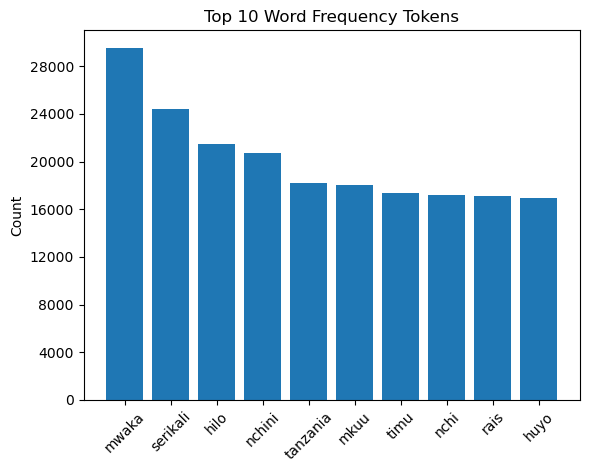

In [31]:
from matplotlib.ticker import MaxNLocator
def visualize_top_10(freq_dist, title):

    # Extract data for plotting
    top_10 = list(zip(*freq_dist.most_common(10)))
    tokens = top_10[0]
    counts = top_10[1]

    # Set up plot and plot data
    fig, ax = plt.subplots()
    ax.bar(tokens, counts)

    # Customize plot appearance
    ax.set_title(title)
    ax.set_ylabel("Count")
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.tick_params(axis="x", rotation=45)
    
visualize_top_10(freq_dist, "Top 10 Word Frequency Tokens")


Here we plotted the results to have a more visual view of the tokens

In [32]:
#lets check the Frequency of words in the label column
df['label'].value_counts()

kitaifa      10190
michezo       6005
burudani      2220
kimataifa     1888
uchumi        1306
afya           813
Name: label, dtype: int64

 - 'kitaifa' is the most frequent value in the 'label' column, appearing 10,190 times.
 - 'afya' is the least frequent value, appearing 813 times.

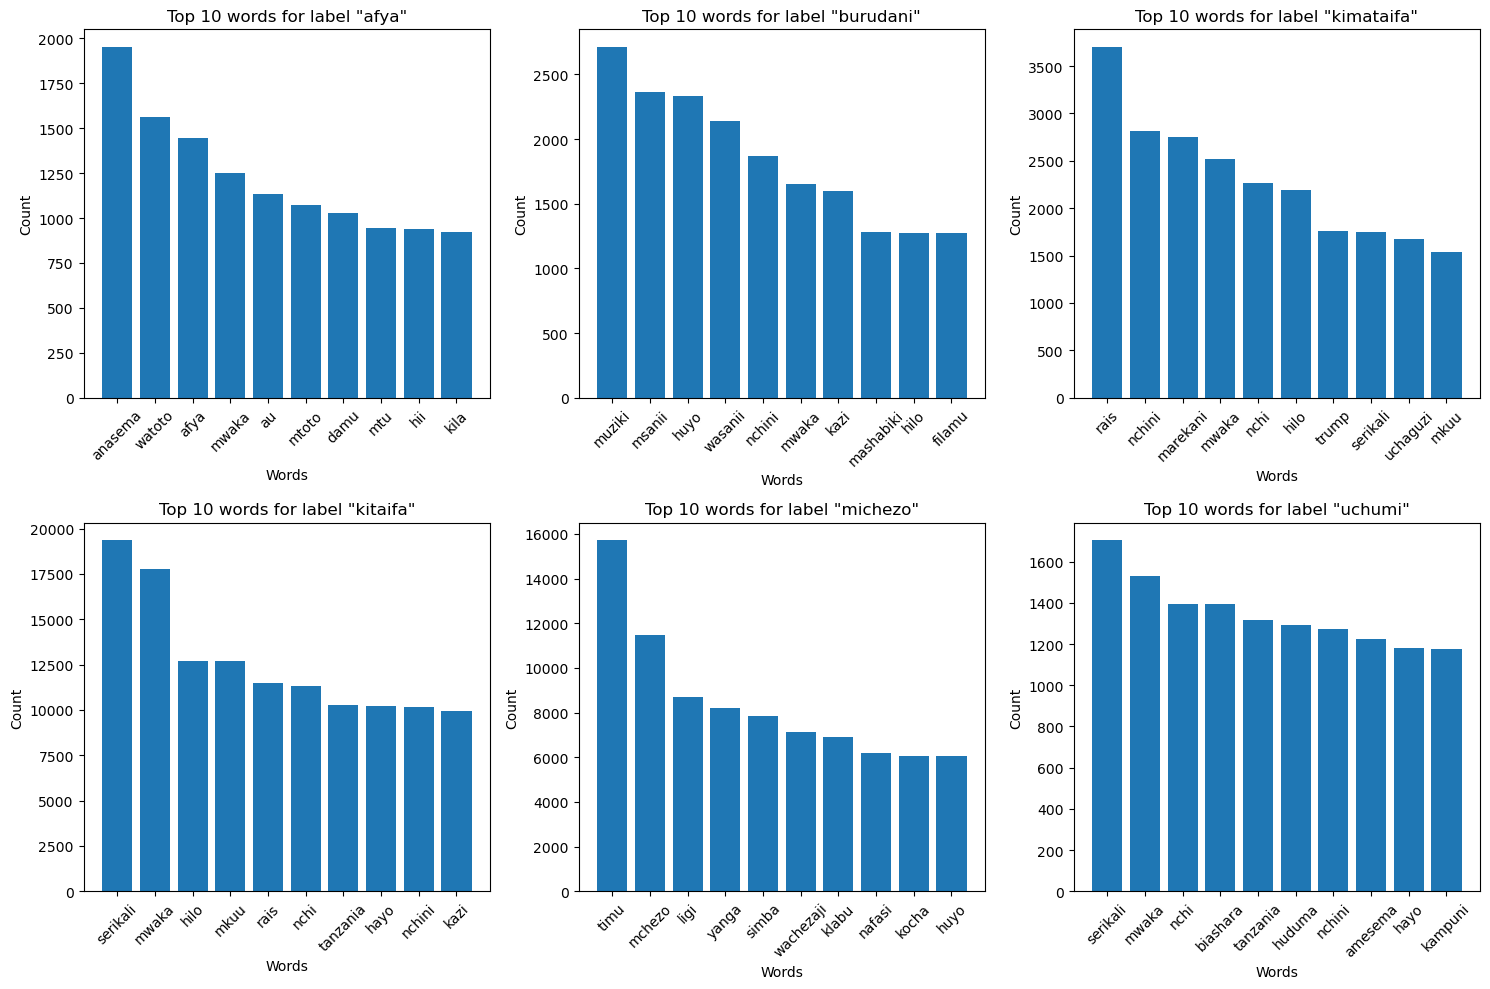

In [33]:
def plot_top_10_for_each_label(df, tokenized_column):
    # Group the data by labels
    grouped_data = df.groupby('label')[tokenized_column]
    # Create a figure with subplots for each label
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
    # Iterate over the labels and plot the top 10 words by count
    for i, (label, tokens) in enumerate(grouped_data):
        # Flatten the list of strings
        flattened_tokens = [token for sublist in tokens for token in sublist]
        # Count the occurrences of each word
        word_counts = pd.Series(flattened_tokens).value_counts()
        top_10_words = word_counts.head(10)
        # Create a bar plot for the current label
        ax = axes[i // 3, i % 3]
        ax.bar(top_10_words.index, top_10_words.values)
        ax.set_title(f'Top 10 words for label "{label}"')
        ax.set_xlabel('Words')
        ax.set_ylabel('Count')
        ax.tick_params(axis='x', rotation=45)
    # Adjust the spacing between subplots
    plt.tight_layout()
    # Show the plots
    plt.show()
    
    
plot_top_10_for_each_label(df, 'tokenized_text')



Here we plotted the top frequent words per label:
- 'anasema' was the top value for the label 'afya'
- 'muziki' was the top value for the label 'burudani'
- 'rais' was the top value for the label 'kimataifa'
- 'serikali' was the top value for the label 'kitaifa'
- 'timu' was the top value for the label 'michezo'
- 'serikali' was the top value for the label 'uchumi'

Modelling

In [34]:
#Vectorization
df.head()

,index,text,label,cleaned_text,tokenized_text
0,0,"bodi ya utalii tanzania (ttb) imesema, itafan...",uchumi,bodi utalii tanzania ttb imesema itafanya misa...,"[bodi, utalii, tanzania, ttb, imesema, itafany..."
1,1,"pendo fundisha-mbeya rais dk. john magufuri, ...",kitaifa,pendo fundisha mbeya rais dk john magufuri ame...,"[pendo, fundisha, mbeya, rais, dk, john, maguf..."
2,2,mwandishi wetu -singida benki ya nmb imetoa ms...,uchumi,mwandishi wetu singida benki nmb imetoa msaada...,"[mwandishi, wetu, singida, benki, nmb, imetoa,..."
3,3,"timu ya taifa ya tanzania, serengeti boys jan...",michezo,timu taifa tanzania serengeti boys jana ilijiw...,"[timu, taifa, tanzania, serengeti, boys, jana,..."
4,4,na agatha charles – dar es salaam aliyekuwa k...,kitaifa,agatha charles dar es salaam aliyekuwa katibu ...,"[agatha, charles, dar, es, salaam, aliyekuwa, ..."


Baseline Vectorization

In [35]:
# create instance 1 vectorizer
bow = CountVectorizer(max_features=10)
#create tokenized column 
df['joined_text'] = df['tokenized_text'].str.join(" ")
x = bow.fit_transform(df['joined_text'])

In [37]:
# Visually inspect the vectorized data
pd.DataFrame.sparse.from_spmatrix(x, columns=bow.get_feature_names_out()).head()

,hilo,huyo,mkuu,mwaka,nchi,nchini,rais,serikali,tanzania,timu
0,0,0,0,2,0,3,0,0,2,0
1,1,0,0,0,0,0,2,2,0,0
2,0,0,0,1,0,3,0,2,0,0
3,0,0,0,0,0,1,0,0,2,1
4,3,0,2,4,0,1,1,1,0,0


Label Encoding the Target 


In [38]:
#instantiate labelencoder
le = LabelEncoder() # initializing the lib
#fit transform 
df['label_code'] = le.fit_transform(df.label)
le.classes_ # viewing the classes

array(['afya', 'burudani', 'kimataifa', 'kitaifa', 'michezo', 'uchumi'],
      dtype=object)

In [39]:
df.head()

,index,text,label,cleaned_text,tokenized_text,joined_text,label_code
0,0,"bodi ya utalii tanzania (ttb) imesema, itafan...",uchumi,bodi utalii tanzania ttb imesema itafanya misa...,"[bodi, utalii, tanzania, ttb, imesema, itafany...",bodi utalii tanzania ttb imesema itafanya misa...,5
1,1,"pendo fundisha-mbeya rais dk. john magufuri, ...",kitaifa,pendo fundisha mbeya rais dk john magufuri ame...,"[pendo, fundisha, mbeya, rais, dk, john, maguf...",pendo fundisha mbeya rais dk john magufuri ame...,3
2,2,mwandishi wetu -singida benki ya nmb imetoa ms...,uchumi,mwandishi wetu singida benki nmb imetoa msaada...,"[mwandishi, wetu, singida, benki, nmb, imetoa,...",mwandishi wetu singida benki nmb imetoa msaada...,5
3,3,"timu ya taifa ya tanzania, serengeti boys jan...",michezo,timu taifa tanzania serengeti boys jana ilijiw...,"[timu, taifa, tanzania, serengeti, boys, jana,...",timu taifa tanzania serengeti boys jana ilijiw...,4
4,4,na agatha charles – dar es salaam aliyekuwa k...,kitaifa,agatha charles dar es salaam aliyekuwa katibu ...,"[agatha, charles, dar, es, salaam, aliyekuwa, ...",agatha charles dar es salaam aliyekuwa katibu ...,3


Fitting Logistic Regression Model

In [40]:
#instatiating 
log_reg= LogisticRegression(random_state=42)
#defining y variable
y= df['label_code']
#fitting the model
log_reg.fit(x,y)


LogisticRegression(random_state=42)

Predicting using our Baseline Model

In [41]:
#loading the test dataset
test_df= pd.read_csv('data/test_v0.2.csv')
#transforming test data
test_matrix= bow.transform(test_df['text'])

test_matrix

<7338x10 sparse matrix of type '<class 'numpy.int64'>'
	with 27411 stored elements in Compressed Sparse Row format>

In [42]:
test_df['label_code'] = le.transform(test_df.label)
le.classes_ # viewing the classes

array(['afya', 'burudani', 'kimataifa', 'kitaifa', 'michezo', 'uchumi'],
      dtype=object)

In [43]:
#predicting
y_pred= log_reg.predict(test_matrix)
y_2= test_df.label_code
#checking accuracy score 
log_reg.score(test_matrix,test_df['label_code'])

0.6871082038702644

Second Model 

In [62]:
#instantiating TFIDF
vectorizer = TfidfVectorizer(max_features=100)
x_tfidf = vectorizer.fit_transform(df['joined_text'])
# Visually inspect the vectorized data
pd.DataFrame.sparse.from_spmatrix(x_tfidf, columns=vectorizer.get_feature_names_out()).head()


,afrika,afya,ajili,akizungumza,ambao,ambapo,ambaye,ambayo,amesema,asilimia,...,viongozi,vizuri,wachezaji,wananchi,watoto,waziri,wengi,wilaya,yanga,zao
0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.215203,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.234245,0.000000,0.0,0.0
1,0.000000,0.000000,0.000000,0.0,0.194929,0.0,0.0,0.0,0.000000,0.0,...,0.139816,0.0,0.000000,0.249048,0.0,0.0,0.000000,0.142206,0.0,0.0
2,0.000000,0.265477,0.067506,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.071254,0.0,0.0,0.000000,0.488234,0.0,0.0
3,0.196668,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.221079,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
4,0.000000,0.000000,0.000000,0.0,0.046724,0.0,0.0,0.0,0.000000,0.0,...,0.134054,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0


In [63]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(x_tfidf, y)



Fitting the Decision Tree

In [64]:
#instatiating
dt=DecisionTreeClassifier(random_state=42)
dt.fit(X_res,y_res)



DecisionTreeClassifier(random_state=42)

Predicting 

In [65]:
#transforming test data
test_tfidf= vectorizer.transform(test_df['text'])


In [66]:

#checking accuracy score 
dt.score(test_tfidf,test_df['label_code'])

0.6674843281548106

Random Forest

In [67]:
rf=RandomForestClassifier(random_state=42)
rf.fit(X_res,y_res)

RandomForestClassifier(random_state=42)

In [68]:
rf.score(test_tfidf,test_df['label_code'])

0.8130280730444263

XG Boost

In [69]:
#instantiate
xgb= XGBClassifier(random_state= 42)
xgb.fit(X_res,y_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [70]:
xgb.score(test_tfidf,test_df['label_code'])

0.8112564731534478

In [71]:

filename = 'vectorizer.pkl'
with open(filename, 'wb') as file:
    pickle.dump(vectorizer, file)

In [72]:
# Create a grid of parameters to test
#param_grid = [{
    #'n_estimators': [200, 300],
    #'criterion': ['gini', 'entropy'],
    #'max_depth': [5, 10],
    #'min_samples_split': [2, 4, 10],
    #'min_samples_leaf': [1, 2]
#}]
# Create a Random Forest classifier
#random_forest = RandomForestClassifier()
# Create grid search with estimators
#grid_search_rf = GridSearchCV(estimator=random_forest,
                              #param_grid=param_grid,
                              #scoring="accuracy",
                              #cv=5,
                              #n_jobs=1)
# Fit the grid with the data
#grid_search_rf.fit(X_res, y_res)
# Get the best parameters
#print("Best Parameters:", grid_search_rf.best_params_)
# Make predictions on the test data using the trained model
#y_pred_grid_search_rf = grid_search_rf.predict(test_tfidf)














In [76]:
# saving model
pickle.dump(rf, open('random_model.pkl', 'wb'))

## Testing the model

In [89]:
def preprocess_text(text):
    # Transform text to lowercase
    text = text.lower()
    #removing emojis
    text = remove_emojis(text)
    # Remove stopwords
    text = swahili_stops(text)
    # Remove punctuations
    text = remove_punctuations(text)
    #Tokenizing 
    text = word_tokenize(text)
    #joining
    text = " ".join(text)

    text = [text]
    #vectorizing
    vector = vectorizer.transform(text)

    return vector

In [92]:
sample = "Timu ya Arsenal ilibwaga Manchester United😲!"

In [95]:
dummy = preprocess_text(sample)
print(dummy)

  (0, 86)	1.0


In [96]:
rf.predict(dummy)

array([4])

In [3]:
import requests

In [23]:
response = requests.get(url='http://127.0.0.1:5000/')
response.text

'welcome'

In [24]:
data = {'text': 'Timu ya Arsenal ilibwaga Manchester United😲!'} 

response = requests.post(url='http://127.0.0.1:5000/predict', json=data)
response.text

'{\n  "prediction": "michezo"\n}\n'